In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# import plotly.express as px

In [191]:
df = pd.read_csv('data/clean_auto_mpg.csv', index_col='Unnamed: 0')

In [192]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Feature engineering

In [193]:
car_names = df['car name']
df.drop(['model year', 'car name'], inplace=True, axis=1)

In [194]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1


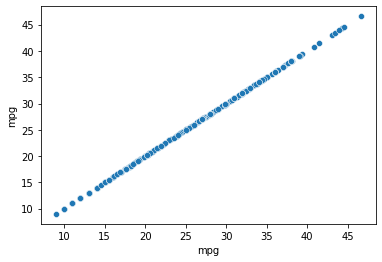

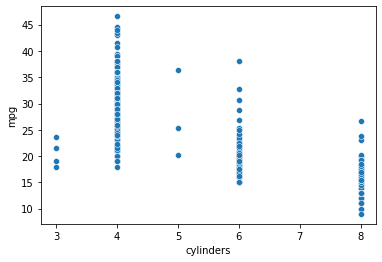

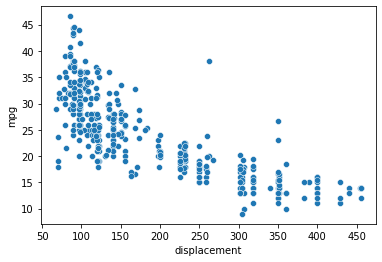

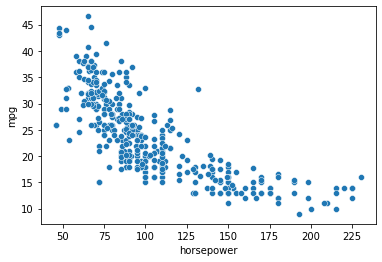

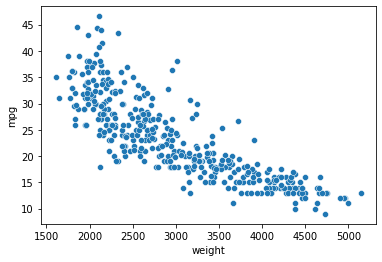

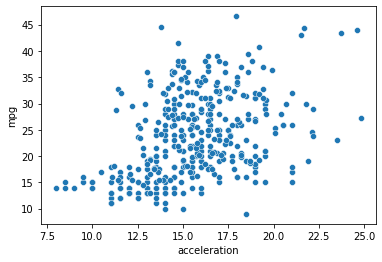

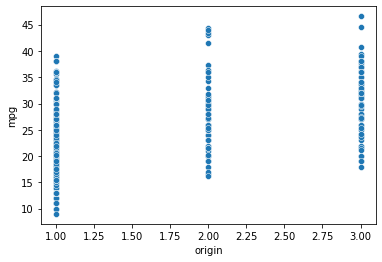

In [195]:
for col in df.columns:
    sns.scatterplot(x=col,y='mpg', data=df)
    plt.show()

In [196]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'],
      dtype='object')

In [197]:
df['power_weight'] = df['horsepower'] / df['weight']

In [198]:
df.drop(['horsepower','weight'], axis=1, inplace=True)

In [199]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'acceleration', 'origin',
       'power_weight'],
      dtype='object')

In [200]:
df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']

In [201]:
df.drop(['displacement','cylinders'], axis=1, inplace=True)

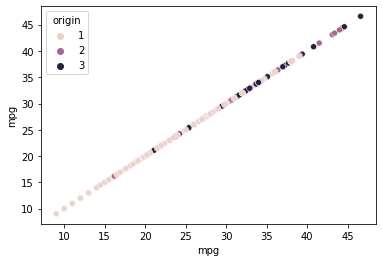

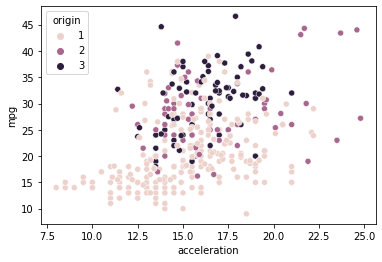

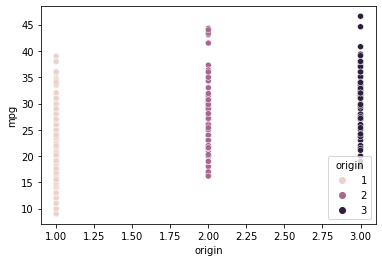

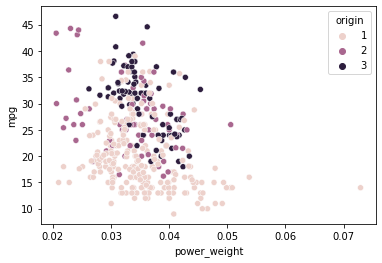

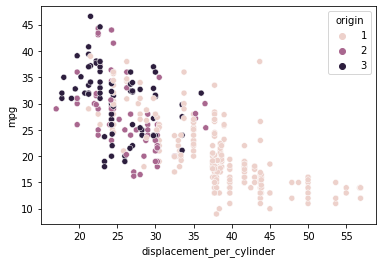

In [202]:
for col in df.columns:
    sns.scatterplot(x=col,y='mpg', data=df, hue='origin')
    plt.show()

In [203]:
df.columns

Index(['mpg', 'acceleration', 'origin', 'power_weight',
       'displacement_per_cylinder'],
      dtype='object')

In [204]:
true_labels = df['origin']

In [205]:
df.drop(['origin','mpg'], inplace=True, axis=1)

In [206]:
df.head()

,acceleration,power_weight,displacement_per_cylinder
0,12.0,0.037100,38.375
1,11.5,0.044679,43.750
2,11.0,0.043655,39.750
3,12.0,0.043694,38.000
4,10.5,0.040591,37.750


## Clustering

In [207]:
cluster_list = [2,3,4,5]
inertia_list = list()
for cluster in cluster_list:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(df.values)
    inertia_list.append(kmeans.inertia_)

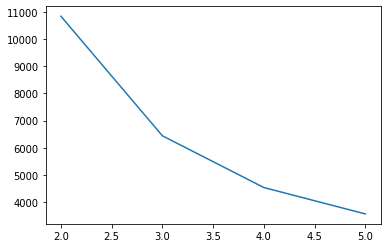

In [208]:
sns.lineplot(x=cluster_list, y=inertia_list)
plt.show()

In [209]:
k3 = KMeans(n_clusters=3)

In [210]:
k3.fit(df.values)

KMeans(n_clusters=3)

In [211]:
prediction = k3.predict(df.values)

In [212]:
df.shape

(392, 3)

In [213]:
k3.cluster_centers_.shape

(3, 3)

In [214]:
k3.cluster_centers_

array([[1.63648045e+01, 3.48893244e-02, 2.53539572e+01],
       [1.22068966e+01, 4.00961910e-02, 4.72356322e+01],
       [1.58380645e+01, 3.27995750e-02, 3.75769892e+01]])

In [215]:
np.unique(prediction)

array([0, 1, 2], dtype=int32)

In [216]:
df['prediction'] = prediction

In [217]:
df['true_classes'] = true_labels
df['car_names'] = car_names

In [218]:
df.head()

,acceleration,power_weight,displacement_per_cylinder,prediction,true_classes,car_names
0,12.0,0.037100,38.375,2,1,chevrolet chevelle malibu
1,11.5,0.044679,43.750,1,1,buick skylark 320
2,11.0,0.043655,39.750,2,1,plymouth satellite
3,12.0,0.043694,38.000,2,1,amc rebel sst
4,10.5,0.040591,37.750,2,1,ford torino


In [219]:
origin1 = df[df['true_classes'] ==1]

In [220]:
origin2 = df[df['true_classes'] ==2]
origin3 = df[df['true_classes'] ==3]

In [221]:
origin1.describe()

,acceleration,power_weight,displacement_per_cylinder,prediction,true_classes
count,245.000000,245.000000,245.000000,245.000000,245.0
mean,14.990204,0.034968,38.119898,1.420408,1.0
std,2.736020,0.006236,7.232986,0.767415,0.0
min,8.000000,0.020979,21.250000,0.000000,1.0
25%,13.000000,0.030450,33.750000,1.000000,1.0
50%,15.000000,0.034047,38.125000,2.000000,1.0
75%,16.700000,0.037629,42.500000,2.000000,1.0
max,22.200000,0.072910,56.875000,2.000000,1.0


In [222]:
origin1

,acceleration,power_weight,displacement_per_cylinder,prediction,true_classes,car_names
0,12.0,0.037100,38.375,2,1,chevrolet chevelle malibu
1,11.5,0.044679,43.750,1,1,buick skylark 320
2,11.0,0.043655,39.750,2,1,plymouth satellite
3,12.0,0.043694,38.000,2,1,amc rebel sst
4,10.5,0.040591,37.750,2,1,ford torino
...,...,...,...,...,...,...
392,17.3,0.030508,37.750,2,1,chevrolet camaro
393,15.6,0.030824,35.000,2,1,ford mustang gl
395,11.6,0.036601,33.750,2,1,dodge rampage
396,18.6,0.030095,30.000,0,1,ford ranger


In [223]:
origin1['prediction'].mode()

0    2
dtype: int32

In [224]:
origin2

,acceleration,power_weight,displacement_per_cylinder,prediction,true_classes,car_names
19,20.5,0.025068,24.250000,0,2,volkswagen 1131 deluxe sedan
20,17.5,0.032560,27.500000,0,2,peugeot 504
21,14.5,0.037037,26.750000,0,2,audi 100 ls
22,17.5,0.040000,26.000000,0,2,saab 99e
23,12.5,0.050582,30.250000,0,2,bmw 2002
...,...,...,...,...,...,...
353,14.2,0.033790,26.250000,0,2,volkswagen jetta
359,20.4,0.024768,35.250000,2,2,peugeot 505s turbo diesel
360,19.6,0.024051,24.166667,0,2,volvo diesel
375,15.3,0.037374,26.250000,0,2,volkswagen rabbit l


In [225]:
origin2['prediction'].mode()

0    0
dtype: int32

In [226]:
origin3

,acceleration,power_weight,displacement_per_cylinder,prediction,true_classes,car_names
14,15.0,0.040051,28.25,0,3,toyota corona mark ii
18,14.5,0.041315,24.25,0,3,datsun pl510
29,14.5,0.041315,24.25,0,3,datsun pl510
31,14.0,0.042639,28.25,0,3,toyota corona
53,19.0,0.036661,17.75,0,3,toyota corolla 1200
...,...,...,...,...,...,...
382,16.9,0.031180,27.00,0,3,toyota corolla
383,15.0,0.034097,22.75,0,3,honda civic
384,15.7,0.034097,22.75,0,3,honda civic (auto)
385,16.2,0.033584,22.75,0,3,datsun 310 gx


In [227]:
origin3['prediction'].mode()

0    0
dtype: int32